<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_2_Image_Recognition_with_FastAI_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconnaissance d'images avec FastAI 

Un des domaines d'application de FastAI est la reconnaissance d'image. Dans cet exercice, nous allons apprendre à notre algorithme à reconnaitre la race d'un chien ou d'un chat sur une photo. 

1. Importez le module ```fastai.vision``` puis à l'intérieur du module ```fastai.metrics``` importez ```error_rate```

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

2. Importez le dataset ```URLs.PETS``` de FastAI via la fonction ```untar_data```. Stockez ceci dans une variable ```path```

In [0]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

2b. Si vous souhaitez avoir plus d'informations sur la fonction ```untar_data```, n'hésitez pas à utiliser ```help(quelque_chose)``` pour les obtenir

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



3. Affichez les différents dossiers qu'il y a dans votre variable ```path```

---



In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

4. Créez vous un chemin pour le dossier ```annotations``` et un chemin pour le dossier ```images```. Vous pourrez utiliser la forme suivante : ```path/"folder_name"```.

Pour plus d'informations, n'hésitez pas à regarder la librairie [Pathlib](https://docs.python.org/3/library/pathlib.html)

In [0]:
path_anno = path/'annotations'
path_img = path/'images' 

5. Via la fonction ```get_image_files```,  stockez toutes les images dans une variable _fnames_

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_189.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_101.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_202.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_198.jpg')]

6. Comme vous pouvez le voir, le nom de nos labels sont contenus dans le nom de l'image. Nous allons besoin d'extraire ce nom de label via une expression régulière. Exécutez donc le code suivant pour obtenir le pattern : 

```
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
```

Si vous êtes curieux, n'hésitez pas à regarder les [expressions régulières](https://www.w3schools.com/python/python_regex.asp)

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

7. Créez vous maintenant un ```DataBunch```, dans lequel vous pourrez stocker tout ce dont vous avez besoin pour entrainer votre modèle. Regardez toutes les informations ici : [ImageDataBunch](https://docs.fast.ai/vision.data.html). Ajustez la taille de votre image à 224 x 224 pixels

In [0]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224,
                                   bs=64
                                   ).normalize(imagenet_stats)

8. Regardez un premier batch de données pour vous donner une idée du dataset 

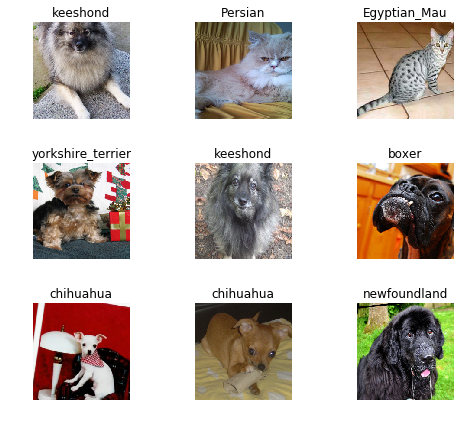

In [0]:
data.show_batch(rows=3, figsize=(7,6))


9. Regardez toutes les différentes classes possibles pour ce dataset.

In [0]:
data.classes


['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

10. Créez un ```cnn_learner``` avec une architecture ```resnet34``` dans lequel vous ajouterez la metric ```error_rate```

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

11. Regardez l'architecture du modèle resnet34

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

12. Entrainez votre modèle 

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.365651,0.322865,0.105548,01:38
1,0.620042,0.255572,0.078484,01:41
2,0.396430,0.230243,0.077131,01:46
3,0.277180,0.213588,0.067659,01:45


13. Regardez vos résultats grâce à ```.show_results()```

In [0]:
learn.show_results()



14. Vos scores ont l'air très bien ! Utilisez maintenant un ```ClassificationInterpretion``` pour essayer d'évaluer votre modèle 


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

15. Quelle fonction pouvez vous utiliser pour voir les observations sur lesquelles vous vous êtes le plus trompé ? 

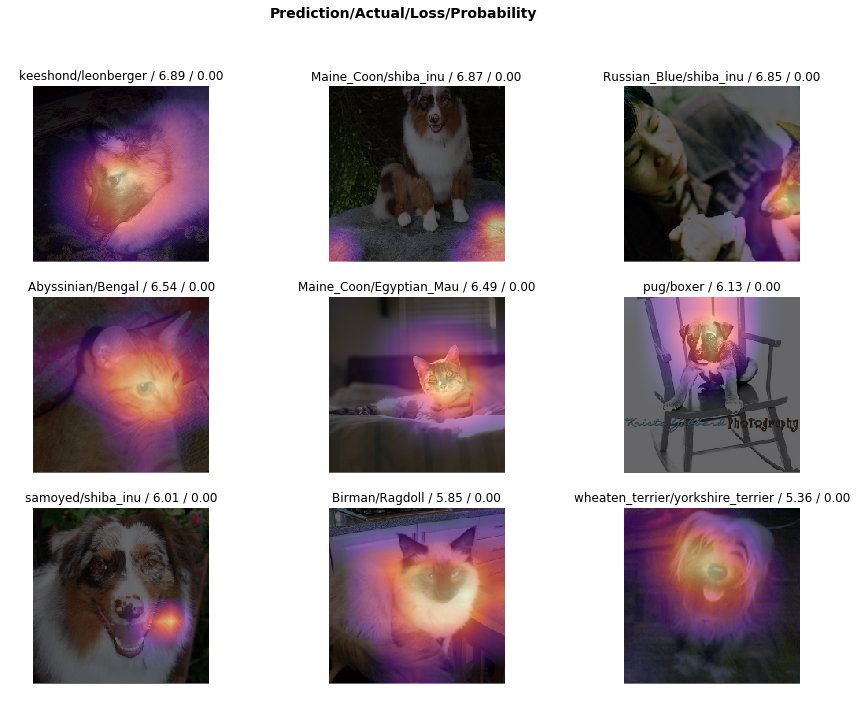

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

<Figure size 1440x1440 with 0 Axes>

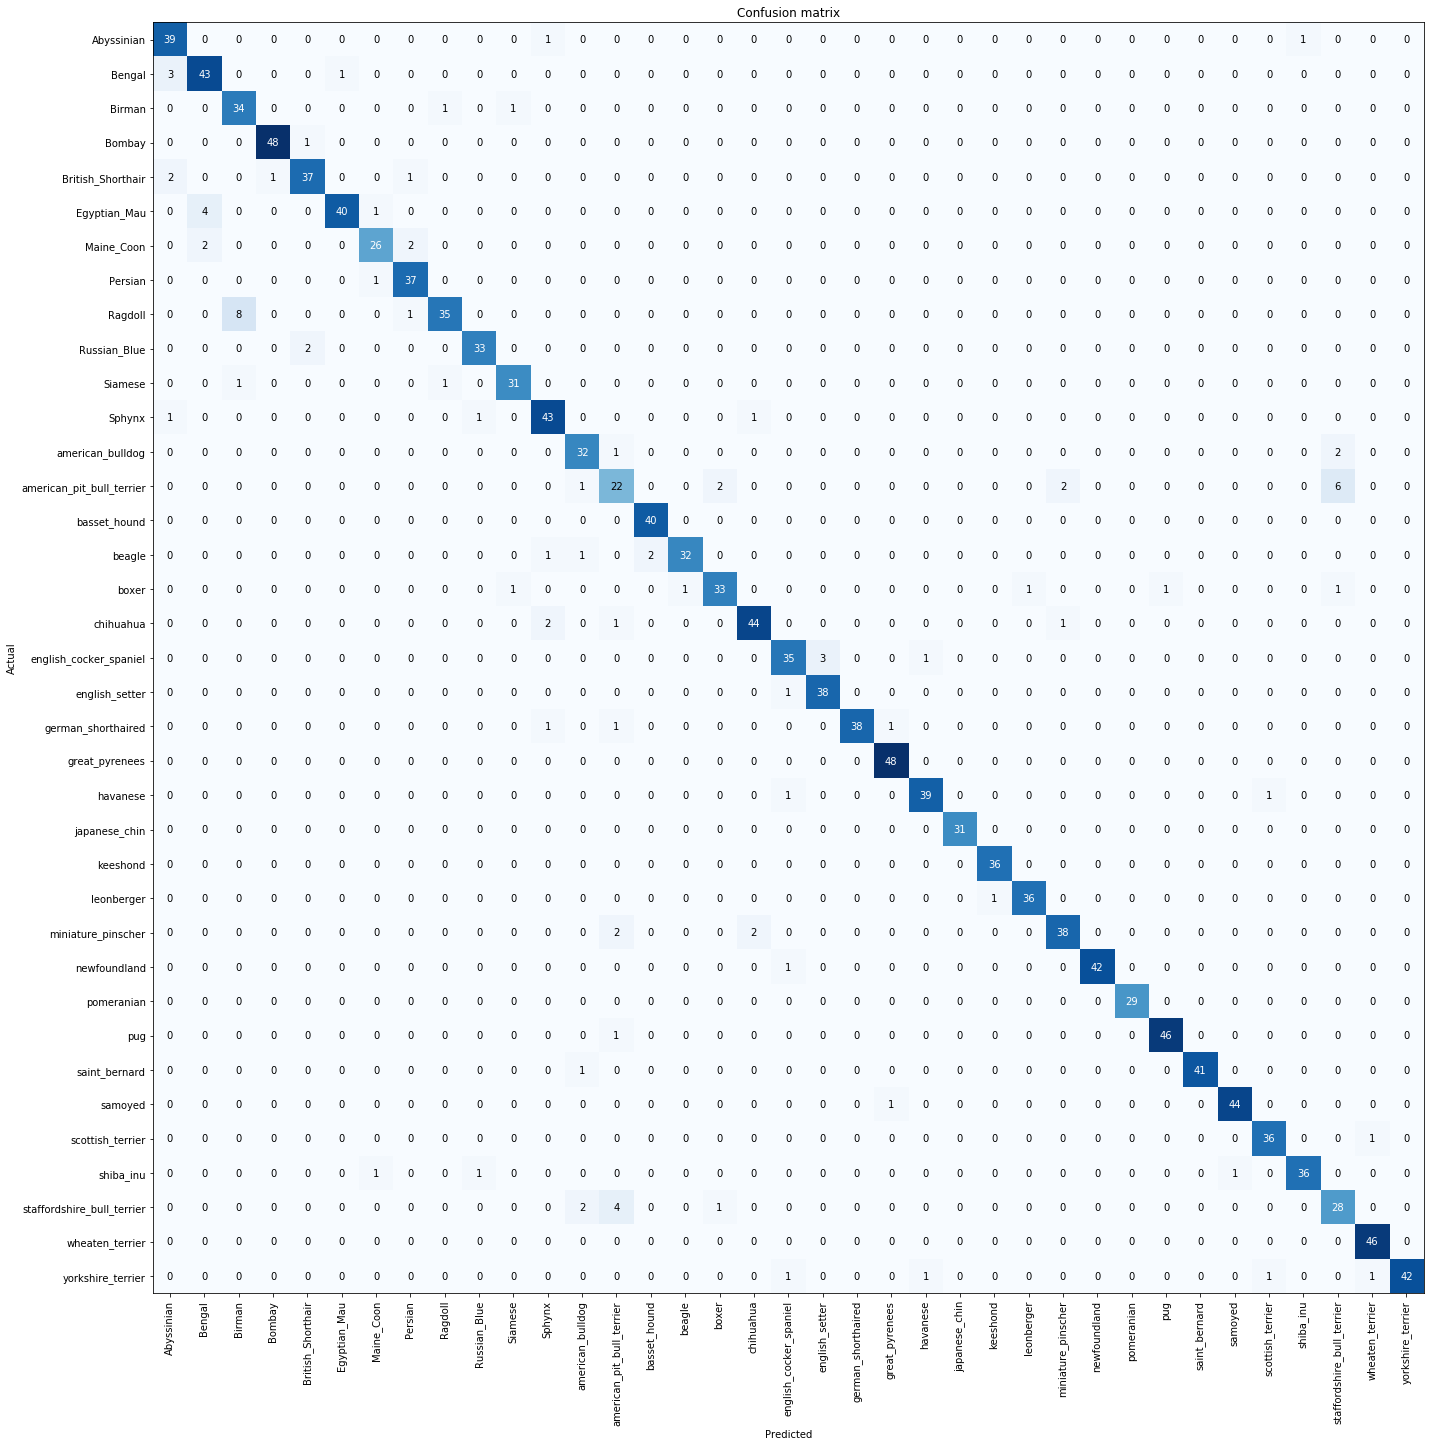

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
interp.plot_confusion_matrix(figsize = (20,20))

In [0]:
import os
list_img = [os.path.join(path_img,a) for a in os.listdir(path_img)]
pat = '_\d+.jpg$'
labels = [str(a).replace(pat, "") for a in os.listdir(path_img)]

In [0]:
'english_cocker_spaniel_71.jpg'.replace("_\d+.jpg","")

'english_cocker_spaniel_71.jpg'

In [0]:
import cv2
img_read = [cv2.imread(a) for a in list_img]

In [0]:
len(img_read)

7392

In [0]:
NoneType = type(None)
isnone = [type(a) == NoneType for a in img_read]

162

In [0]:
img_clean = [d for d, s in zip(img_read, isnone) if s==False]

In [0]:
len(img_clean)

7383

In [0]:
new_width = 224
new_height =224
img_crop = []
for im in img_clean :
  shape = im.shape   # Get dimensions

  left = (shape[0] - new_width)/2
  top = (shape[1] + new_height)/2
  right = (shape[0] + new_width)/2
  bottom = (shape[1] - new_height)/2

  # Crop the center of the image
  im = im[int(left):int(right), int(bottom):int(top)]
  img_crop.append(im)

In [0]:
img_flat = [img.reshape(224*224*3) for img in img_crop if img.shape == (224,224,3)]

In [0]:
len(img_flat)

7098

36.0